# **Scikit Learn**

머신러닝 라이브러리 <br>
이제 진짜 시작입니다! <br>



> **머신러닝**이란?

데이터에서 자동으로 규칙을 찾아 정해진 일을 수행하는 기작



> 쉬운거부터 해보자고요!

도미와 빙어를 구분해볼까요? <br>
물고기의 크기가 주어졌을때 물고기의 종류를 판별하는 머신러닝 알고리즘을 만들어봅시다. <br>

데이터는 [여기](https://www.kaggle.com/aungpyaeap/fish-market)에서 발췌되었습니다. <br>

In [2]:
# 도미의 길이와 무게 리스트입니다

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 빙어의 길이와 무게 리스트입니다.

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]



> matplotlib.pyplot

그래프를 그려줍니다. 패키지 사용법은 천천히 익히고 우선 그래프 그리는 코드만 만들어봅시다. <br>
중학교때 산점도는 다 배웠죠?

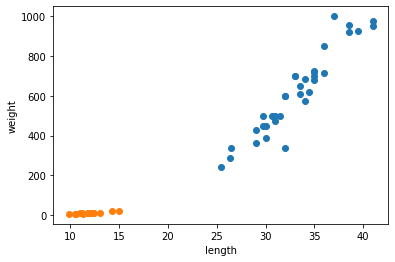

In [3]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



> k-최근접 이웃 알고리즘

간단하고 고전적이지만 강력한 알고리즘입니다. <br>
산점도 상에서 가장 가까운 k개의 점을 찾아 그 점들의 특성을 파악해, 가장 많은 특성을 출력합니다. <br> <br>
이러한 알고리즘 구현 방법때문에 데이터가 너무 많을때에는 부적합합니다. 거리 계산하는데 비용이 크게 들거든요.

> 데이터 전처리

위에 나열되어 있는 리스트를, 2차원 리스트로 바꾸어 각각의 원소가 생선의 무게와 길이를 표현하는 리스트로 나타내어져야 학습에 용이합니다.

In [4]:
# 데이터를 전처리합니다.
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 위와 같은 상태로는, 도미 35개 데이터와 빙어 14개의 데이터가
# 그대로 하나의 리스트에 들어갈 것입니다.

# 이를 하나의 리스트로 묶기 위해, zip 함수를 사용합니다.
# zip 함수는 리스트 각각에서 하나씩 원소를 꺼내 반환합니다.
fish_data = [[l, w] for l, w in zip(length, weight)]

# 전처리가 잘 되었는지 확인해볼까요?
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


> 정답 데이터

정답 없이 규칙을 찾으라고 하면 아직은 저희에게는 너무 가혹합니다. <br>
<font size="2em" color="gray">
정답 없이 규칙을 찾는 것을 비지도학습이라 합니다. <br>
</font>
그런 의미로 저희는 정답 데이터를 만들어줘야 합니다. <br>
위의 2차원 리스트와 같은 인덱스에 정답이 들어갈 수 있도록 정답표를 작성합니다.

In [5]:
# 위에서는 도미와 빙어를 섞지 않고 그냥 합쳤습니다.
# 즉 앞에서부터 35개는 도미, 나머지는 빙어라는 뜻입니다.
# 도미를 1, 빙어를 0이라고 약속하고 정답 데이터를 만들어봅시다.
fish_target = [1]*35 + [0]*14

# 데이터 생성이 잘 되었는지 확인해볼까요?
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


> 학습용 데이터와 검증용 데이터

학습할 때 사용할 데이터와 학습이 잘 되었는지 검증하는 데이터를 나누는 건 정말 중요합니다. <br> 과적합 여부를 판별하는데 중요한 단서가 되기 때문이죠. <br>

정말 중요한건 학습용과 검증용이 가지고 있는 데이터가, 도미와 빙어의 비율이 비슷해야 한다는 점입니다.

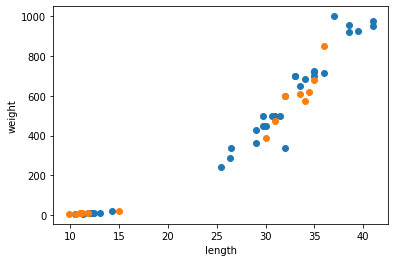

In [14]:
# 무작정 나눌수는 없고, numpy 패키지를 이용해서 배열을 섞을겁니다.
# Numpy 모듈을 불러옵니다.
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

# 랜덤하게 섞기 위해 seed값을 설정합니다.
# seed가 뭐냐고요? 직접 물어보세요.
np.random.seed(42)
# 0부터 48까지 증가하는 인덱스를 만들고..
index = np.arange(49)
# 섞습니다.
np.random.shuffle(index)

# 이 섞인 인덱스로 리스트를 슬라이싱해봅시다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

# 잘 섞였는지 확인해보자고요.
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



> 알고리즘 구현하기

솔직히 앞으로 인공지능을 다루면서 여러가지 알고리즘을 직접 구현할 일을 적을겁니다. <br>
미리 다 만들어놨거든요. <br>

In [16]:
# Scikit Learn 모듈을 불러옵니다.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
# n_neighbors 값을 조절해 k, 영향 받을 가까운 데이터 수를 지정합니다. 

# fit 메서드를 이용하여 데이터를 학습시킵니다.
# 대부분의 모델에 대해 동일한 방법을 사용하니 기억해두세요
model.fit(train_input, train_target)

# 테스트 데이터로 모델 성능을 테스트해봅니다.
model.score(test_input, test_target)
# 0이면 최악, 1이면 최고입니다.

1.0

> 모델 확인하기

길이 30, 무게 600인 물고기는 어디에 속할까요?

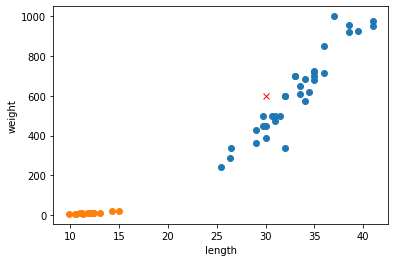

In [17]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
# 30, 600 점을 찍어봅시다
plt.plot([30],[600], 'rx')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

직관적으로 도미일거 같죠? 확인해봅시다.

In [18]:
# predict 메서드는 데이터에 대해 예측값을 반환합니다.
x = model.predict([[30, 600]])

print("도미") if x==1 else print("빙어")

도미


> 아니 근데요

잘 생각해보면 이 모델 조금 이상합니다. <br>
길이 25에 무게 150인 생선을 생각해보자고요.

Text(0, 0.5, 'weight')

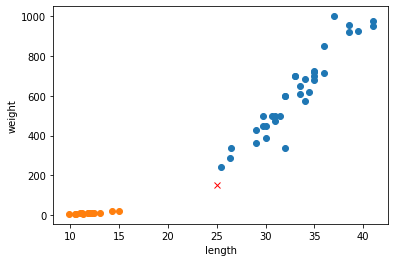

In [19]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
# 25, 150 점을 찍어봅시다
plt.plot([25],[150], 'rx')
plt.xlabel('length')
plt.ylabel('weight')

누가 봐도 도미인데요;; 이 모델은 말이죠...

In [20]:
x = model.predict([[25, 150]])

print("도미") if x==1 else print("빙어")

빙어


ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ<br>
다 망했어요 이 방법은 정말 쓸모가 없나요... <br>



> 데이터 전처리 : 심화편

이 문제는 길이에 비해 무게가 너무나 크다는데에 있습니다. <br> 이러한 문제는 확통시간에 배우는 정규화로 풀 수 있습니다.<br>다음 장에서 다시 이 문제를 정상적으로 풀어보죠.